<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/Project2_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [239]:
  #Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
# Import statsmodels library
import statsmodels.api as sm
from google.colab import drive


In [240]:
#Cargar datos
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/MINDD/energy_demand.csv', delimiter=";")
#df = pd.read_csv("/content/drive/MyDrive/train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
#Cargar Datos
#df = pd.read_csv("/content/drive/MyDrive/energy_demand.csv", delimiter=";")
#print(df)

# EDA

#### Tabular exploration

In [242]:
# Drop columns NaN
df = df.drop("Unnamed: 5", axis=1)
df = df.drop("Unnamed: 4", axis=1)
df = df.drop("Unnamed: 6", axis=1)

In [243]:
df

,Date,Hour,load,T
0,01/01/2012,0:00:00,2872.0,30.666667
1,01/01/2012,1:00:00,2698.0,32.000000
2,01/01/2012,2:00:00,2558.0,32.666667
3,01/01/2012,3:00:00,2444.0,30.000000
4,01/01/2012,4:00:00,2402.0,31.000000
...,...,...,...,...
26300,31/12/2014,20:00:00,4012.0,18.000000
26301,31/12/2014,21:00:00,3856.0,16.666667
26302,31/12/2014,22:00:00,3671.0,17.000000
26303,31/12/2014,23:00:00,3499.0,15.333333


In [244]:
df.columns

Index(['Date', 'Hour', 'load', 'T'], dtype='object')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    26305 non-null  object 
 1   Hour    26305 non-null  object 
 2   load    26305 non-null  float64
 3   T       26305 non-null  float64
dtypes: float64(2), object(2)
memory usage: 822.2+ KB


In [246]:
#check null values
df.isnull().sum(axis = 0)

Date    0
Hour    0
load    0
T       0
dtype: int64

In [247]:
# shape
print(df.shape)
# describe
print(df.describe())

(26305, 4)
               load             T
count  26305.000000  26305.000000
mean    3303.752785     47.764988
std      564.574798     19.338062
min     1979.000000    -13.666667
25%     2867.000000     32.666667
50%     3364.000000     48.333333
75%     3690.000000     63.666667
max     5224.000000     95.000000


#### Check and Removing Outliers

###### Load Outliers

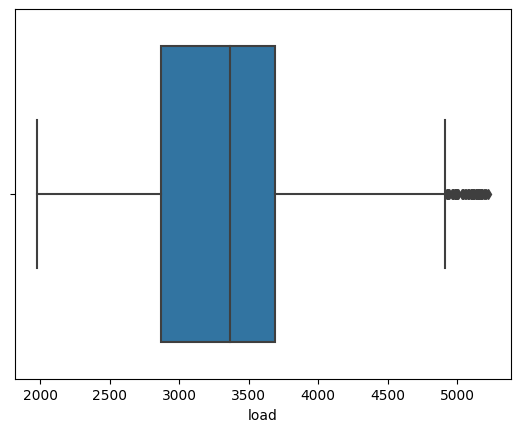

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['load'])
plt.show()


In [249]:
from scipy import stats

z_scores = stats.zscore(df['load'])
outliers = (z_scores > 3) | (z_scores < -3)

# Exibir índices dos outliers
print(df['load'][outliers].index)


Int64Index([13476, 13477, 13478, 13479, 13480, 13481, 13482, 13483, 13500,
            13501, 13502, 13503, 13504, 13505, 13506, 13507, 13525, 13526,
            13527, 13528, 13529, 13530, 13531, 13532, 13548, 13549, 13550,
            13551, 13552, 13572, 13573, 13574, 13575, 13576, 13577, 13578,
            13579, 21926, 21927],
           dtype='int64')


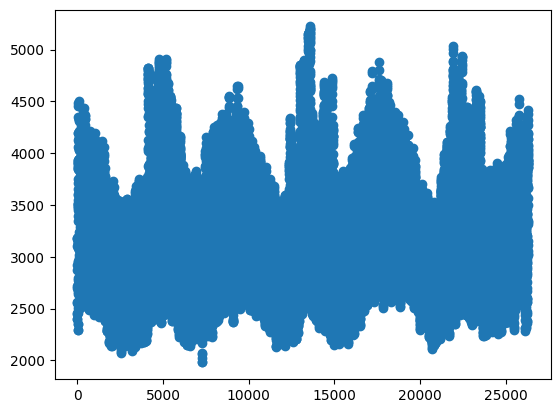

In [250]:
plt.scatter(df.index, df['load'])
plt.show()


In [251]:
Q1 = df['load'].quantile(0.25)
Q3 = df['load'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = (df['load'] < Q1 - 1.5 * IQR) | (df['load'] > Q3 + 1.5 * IQR)

# Exibir índices dos outliers
print(df['load'][outliers].index)


Int64Index([13476, 13477, 13478, 13479, 13480, 13481, 13482, 13483, 13484,
            13499, 13500, 13501, 13502, 13503, 13504, 13505, 13506, 13507,
            13508, 13524, 13525, 13526, 13527, 13528, 13529, 13530, 13531,
            13532, 13533, 13547, 13548, 13549, 13550, 13551, 13552, 13553,
            13571, 13572, 13573, 13574, 13575, 13576, 13577, 13578, 13579,
            13580, 13581, 21925, 21926, 21927, 22430, 22431, 22432],
           dtype='int64')


 REMOVE OUTLIERS

In [252]:
df = df[~outliers]

###### Temperature Outliers

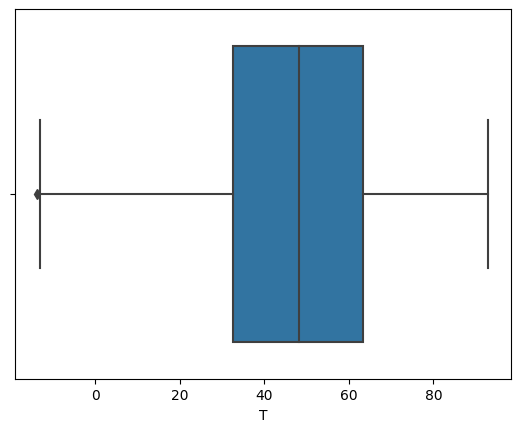

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['T'])
plt.show()

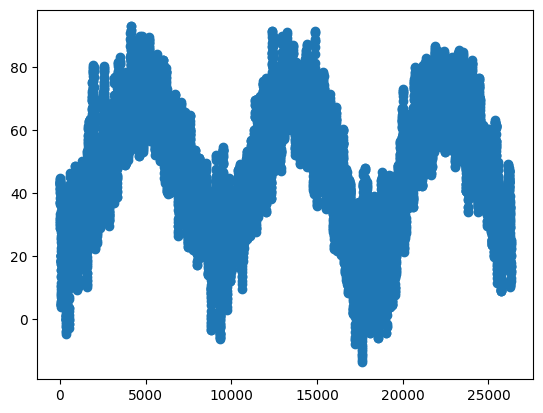

In [254]:
plt.scatter(df.index, df['T'])
plt.show()

In [255]:
from scipy import stats

z_scores = stats.zscore(df['load'])
outliers = (z_scores > 3) | (z_scores < -3)

# Exibir índices dos outliers
print(df['load'][outliers].index)

Int64Index([], dtype='int64')


In [256]:
Q1 = df['T'].quantile(0.25)
Q3 = df['T'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = (df['T'] < Q1 - 1.5 * IQR) | (df['T'] > Q3 + 1.5 * IQR)

# Exibir índices dos outliers
print(df['T'][outliers].index)

Int64Index([17619], dtype='int64')


In [257]:
df = df[~outliers]

#### Converting DateTime Column

In [258]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [259]:
df['datetime'] = df['Date'] +  pd.to_timedelta(df['Hour'])

In [260]:
df['Weekday'] = pd.to_datetime(df['Date']).dt.dayofweek

In [261]:
df = df.drop('Date',axis=1)
df = df.drop('Hour',axis=1)

In [262]:
df.dtypes
df["T"] = pd.to_numeric(df["T"])

In [263]:
df.set_index('datetime',inplace=True)

In [264]:
weekday_mapping = {0: 7, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
df['Weekday'] = df.index.dayofweek.map(weekday_mapping) + 1

In [265]:
#Removing line with year = 2015
df = df.drop(df.index[-1])

In [266]:
df

,load,T,Weekday
datetime,,,
2012-01-01 00:00:00,2872.0,30.666667,7
2012-01-01 01:00:00,2698.0,32.000000,7
2012-01-01 02:00:00,2558.0,32.666667,7
2012-01-01 03:00:00,2444.0,30.000000,7
2012-01-01 04:00:00,2402.0,31.000000,7
...,...,...,...
2014-12-31 19:00:00,4199.0,20.000000,3
2014-12-31 20:00:00,4012.0,18.000000,3
2014-12-31 21:00:00,3856.0,16.666667,3


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26250 entries, 2012-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   load     26250 non-null  float64
 1   T        26250 non-null  float64
 2   Weekday  26250 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 820.3 KB


####  Autocorrelation and multicollinearity

##### Tabular

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extrair as variáveis independentes para a análise de multicolinearidade
X_multicollinearity = df[['load', 'T', 'Weekday']]

# Calcular o fator de inflação da variância (VIF)
vif_data = pd.DataFrame()
vif_data["Variável"] = X_multicollinearity.columns
vif_data["VIF"] = [variance_inflation_factor(X_multicollinearity.values, i) for i in range(X_multicollinearity.shape[1])]

# Exibir tabela de VIF
print("Tabela de VIF para Análise de Multicolinearidade:")
print(vif_data)


Tabela de VIF para Análise de Multicolinearidade:
  Variável       VIF
0     load  9.631371
1        T  6.533148
2  Weekday  5.877532


Tabela de Autocorrelação:
             load         T   Weekday
load     1.000000  0.060388 -0.113195
T        0.060388  1.000000  0.004476
Weekday -0.113195  0.004476  1.000000

Estatística Durbin-Watson para Resíduos da Coluna 'load': 0.0024909304204171288


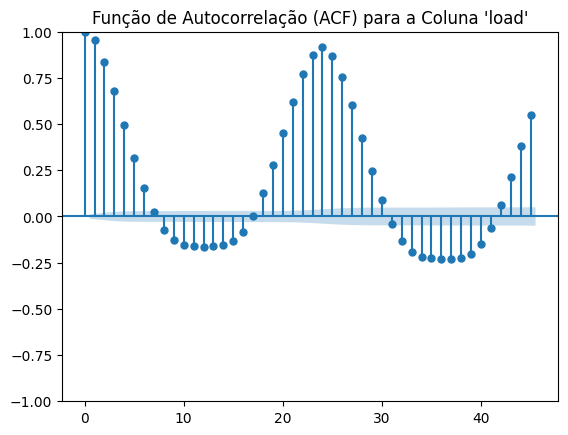

In [269]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelação
autocorrelation_table = df[['load', 'T', 'Weekday']].corr()

# Estatística Durbin-Watson para verificar a autocorrelação nos resíduos
dw_statistics = durbin_watson(df['load'])

# Exibir tabelas de autocorrelação e estatística Durbin-Watson
print("Tabela de Autocorrelação:")
print(autocorrelation_table)
print("\nEstatística Durbin-Watson para Resíduos da Coluna 'load':", dw_statistics)

# Gráfico de Função de Autocorrelação (ACF)
plot_acf(df['load'])
plt.title("Função de Autocorrelação (ACF) para a Coluna 'load'")
plt.show()


##### Graphical

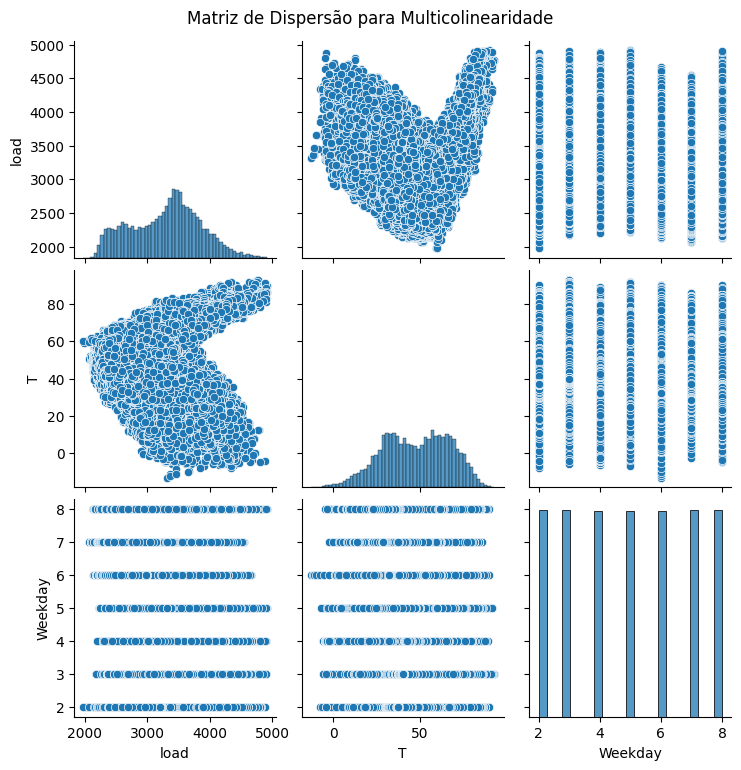

In [270]:
# Criar uma matriz de dispersão para visualizar a multicolinearidade
sns.pairplot(df[['load', 'T', 'Weekday']])
plt.suptitle("Matriz de Dispersão para Multicolinearidade", y=1.02)
plt.show()

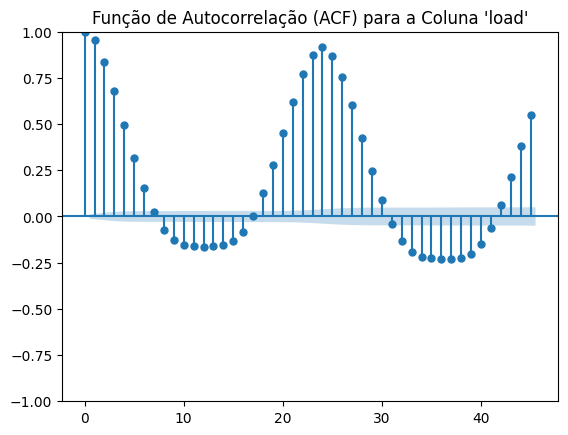

In [271]:
# Gráfico de Função de Autocorrelação (ACF) para a coluna 'load'
plot_acf(df['load'])
plt.title("Função de Autocorrelação (ACF) para a Coluna 'load'")
plt.show()

#### Graphics Exploration

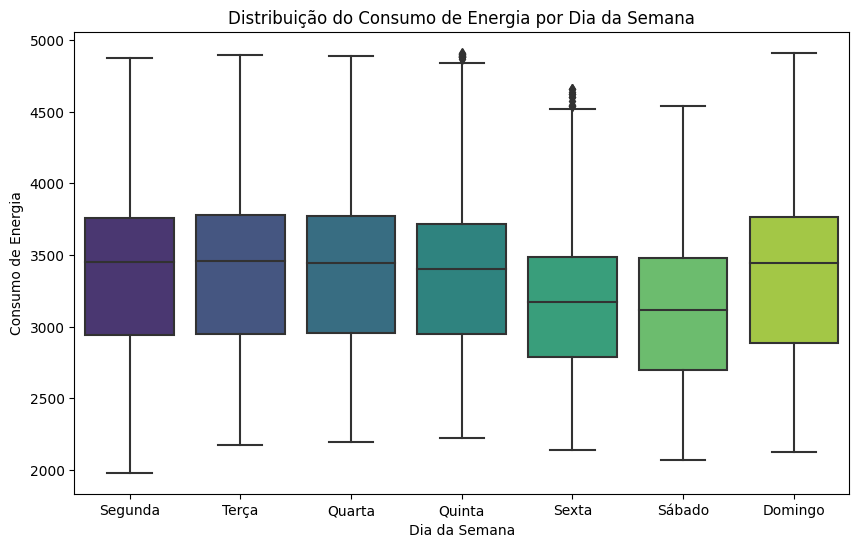

In [272]:
# Criar um boxplot para analisar o consumo de energia por dia da semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='load', data=df, palette='viridis')
plt.xlabel('Dia da Semana')
plt.ylabel('Consumo de Energia')
plt.title('Distribuição do Consumo de Energia por Dia da Semana')
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.show()

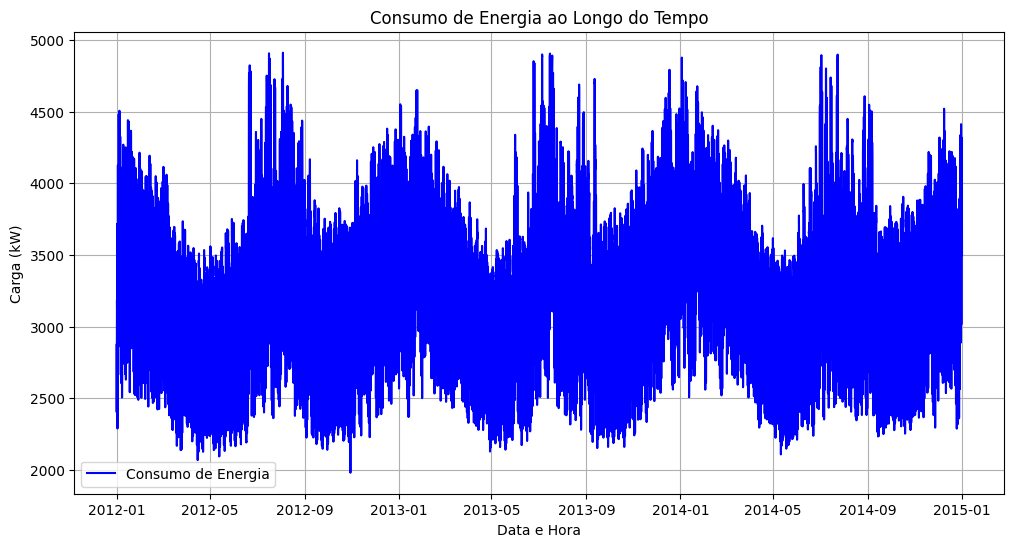

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['load'], label='Consumo de Energia', color='blue')
plt.title('Consumo de Energia ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Carga (kW)')
plt.legend()
plt.grid(True)
plt.show()


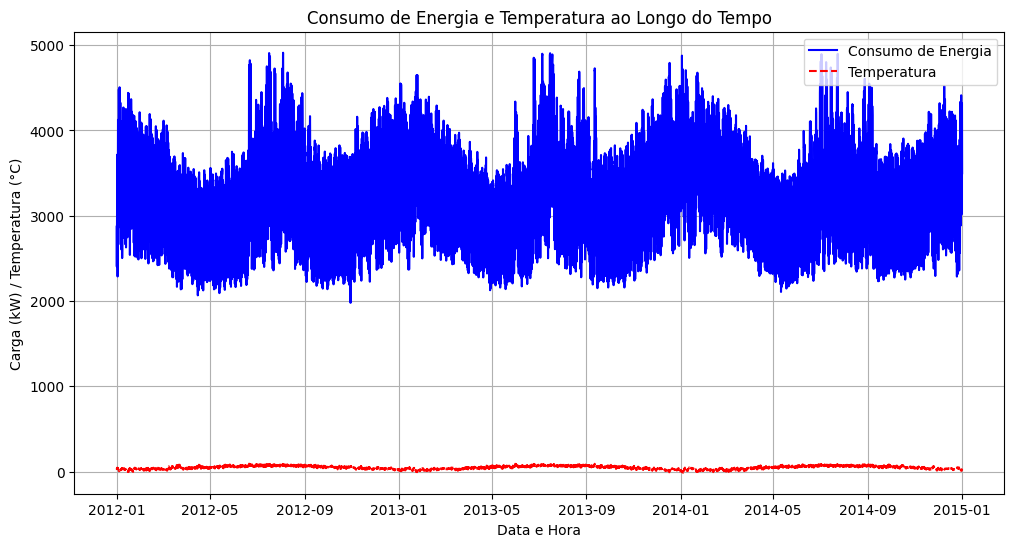

In [274]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['load'], label='Consumo de Energia', color='blue')
plt.plot(df.index, df['T'], label='Temperatura', color='red', linestyle='--')
plt.title('Consumo de Energia e Temperatura ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Carga (kW) / Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


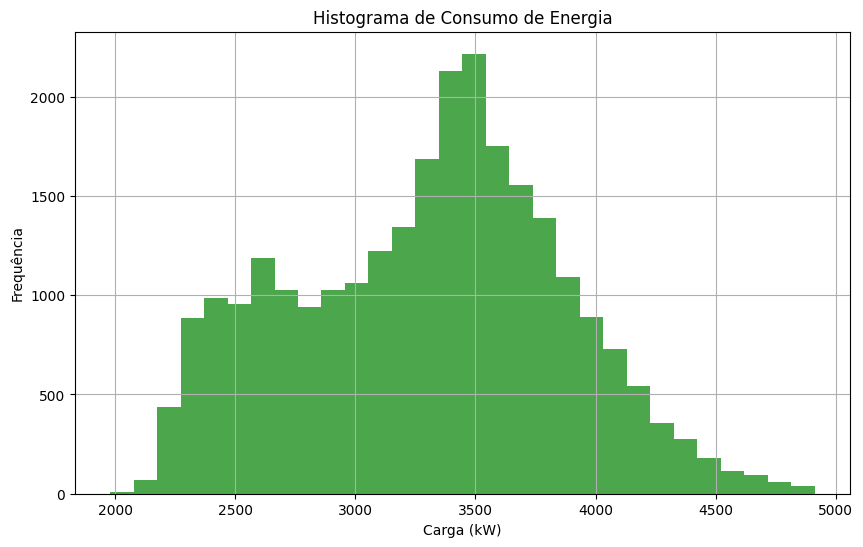

In [275]:
plt.figure(figsize=(10, 6))
plt.hist(df['load'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de Consumo de Energia')
plt.xlabel('Carga (kW)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


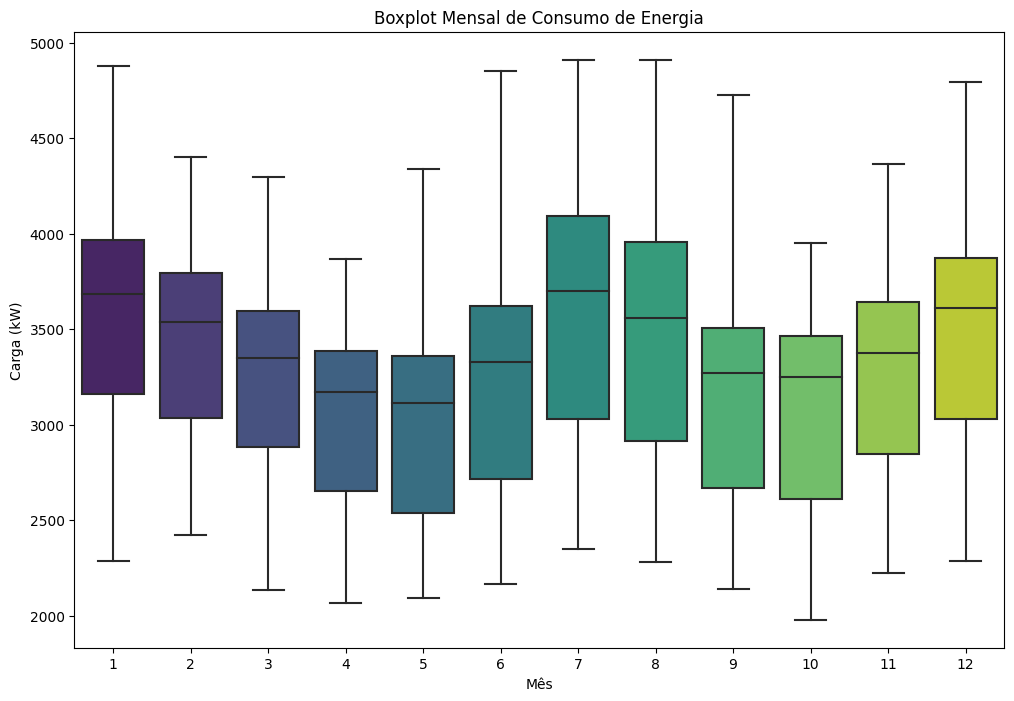

In [276]:
import seaborn as sns

df['Month'] = df.index.month
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='load', data=df, palette='viridis')
plt.title('Boxplot Mensal de Consumo de Energia')
plt.xlabel('Mês')
plt.ylabel('Carga (kW)')
plt.show()


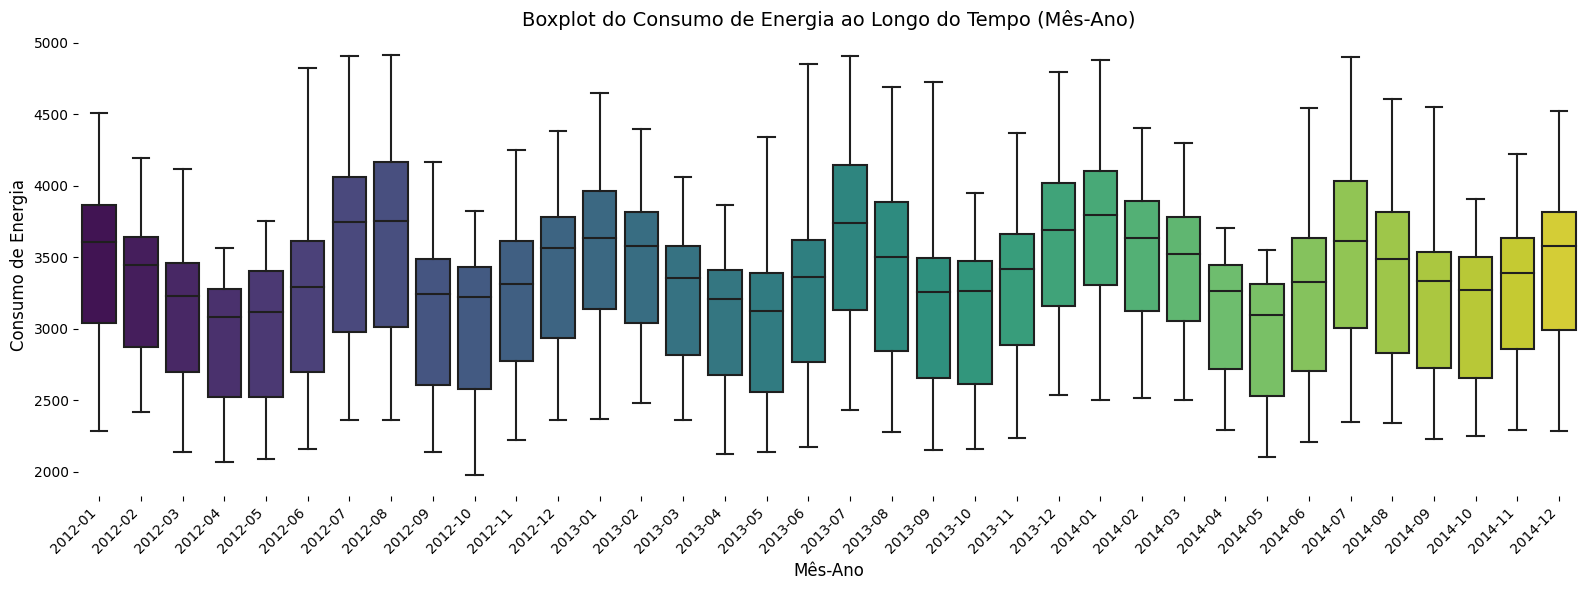

In [277]:
# Criar uma figura com 1 subplot
plt.figure(figsize=(16, 6))

# Extrair uma nova coluna "MesAno" combinando mês e ano
df['MesAno'] = df.index.to_period('M')

# Boxplot do consumo de energia por mês e ano
sns.boxplot(x=df['MesAno'], y="load", data=df, palette='viridis')
plt.xlabel('Mês-Ano', fontsize=12)
plt.ylabel('Consumo de Energia', fontsize=12)
plt.title('Boxplot do Consumo de Energia ao Longo do Tempo (Mês-Ano)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos do eixo x para melhor legibilidade
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Exibir o plot
plt.show()


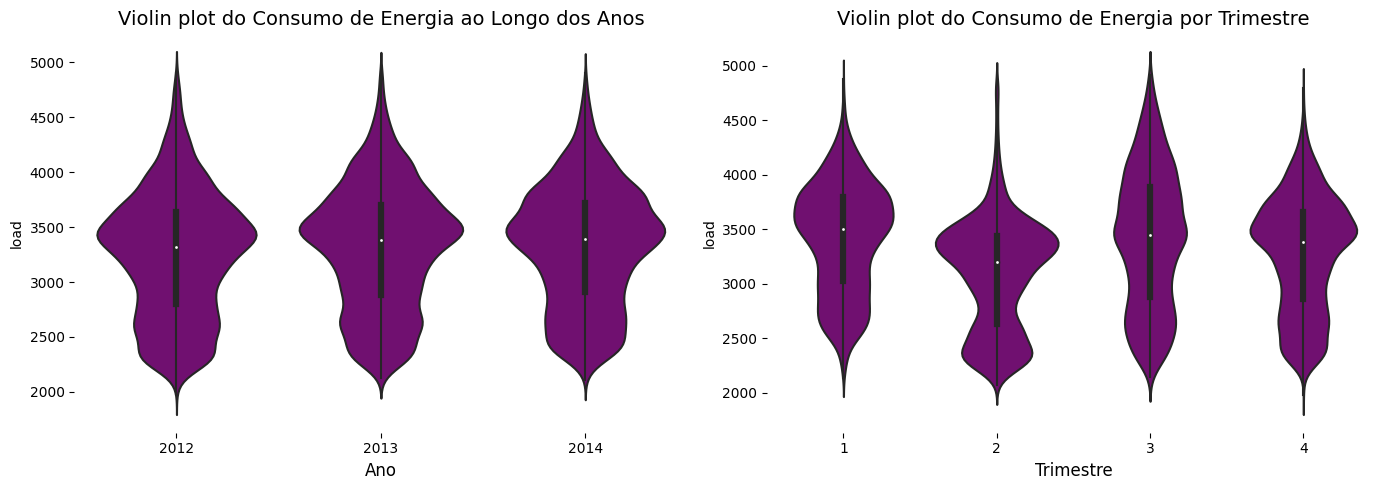

In [278]:
# Criar uma figura com 2 subplots
plt.figure(figsize=(14, 5))

# Subplot 1: Violin plot do consumo de energia ao longo dos anos
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
sns.violinplot(x=df.index.year, y="load", data=df, color='purple')
plt.xlabel('Ano', fontsize=12)
plt.title('Violin plot do Consumo de Energia ao Longo dos Anos', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Subplot 2: Violin plot do consumo de energia por trimestre
plt.subplot(1, 2, 2)
sns.violinplot(x=df.index.quarter, y="load", data=df, color='purple')
plt.xlabel('Trimestre', fontsize=12)
plt.title('Violin plot do Consumo de Energia por Trimestre', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Exibir os plots
plt.show()


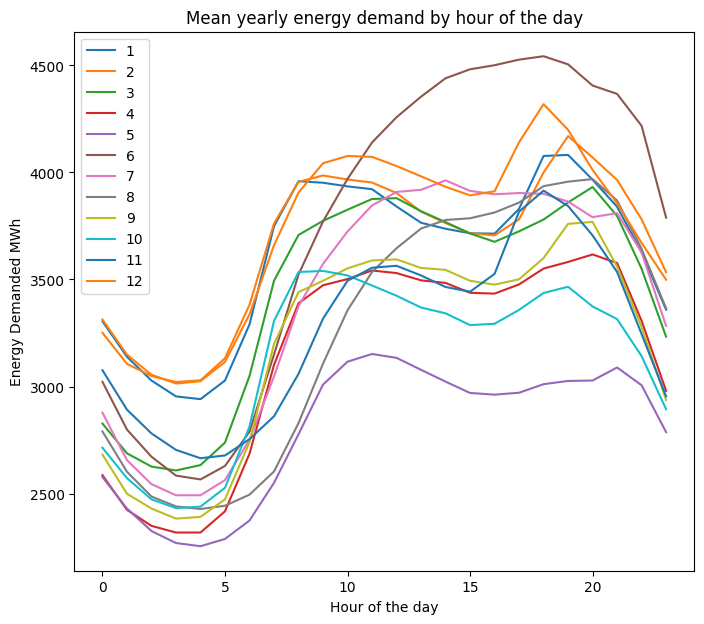

In [279]:
group_hours = df['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

year_demands = pd.DataFrame()

for name, group in group_hours:
    year_demands[name.month] = pd.Series(group.values)

year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean yearly energy demand by hour of the day');

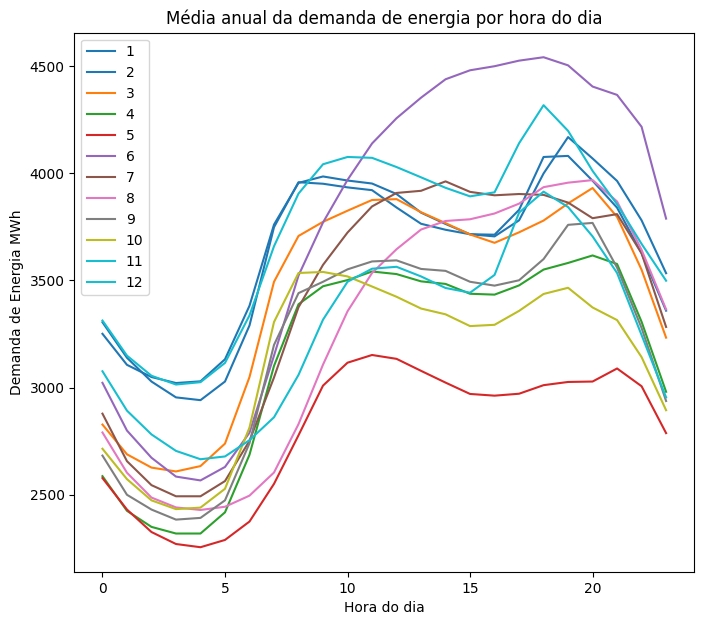

In [280]:
# Criar um objeto GroupBy usando Grouper para agrupar os dados por dia (freq='D') e calcular a média diária ('how='mean'')
group_hours = df['load'].groupby(pd.Grouper(freq='D', how='mean'))

# Criar uma figura e eixos para o gráfico
fig, axs = plt.subplots(1, 1, figsize=(8, 7))

# Criar um DataFrame vazio para armazenar as demandas médias por mês
year_demands = pd.DataFrame()

# Iterar sobre os grupos criados pelo GroupBy
for name, group in group_hours:
    # Adicionar uma coluna ao DataFrame year_demands para cada mês, contendo a série de demandas para esse mês
    year_demands[name.month] = pd.Series(group.values)

# Plotar o DataFrame year_demands, onde cada coluna representa um mês, usando a paleta 'viridis'
year_demands.plot(ax=axs, cmap='tab10')

# Adicionar rótulos e título ao gráfico
axs.set_xlabel('Hora do dia')
axs.set_ylabel('Demanda de Energia MWh')
axs.set_title('Média anual da demanda de energia por hora do dia')

# Exibir o gráfico
plt.show()


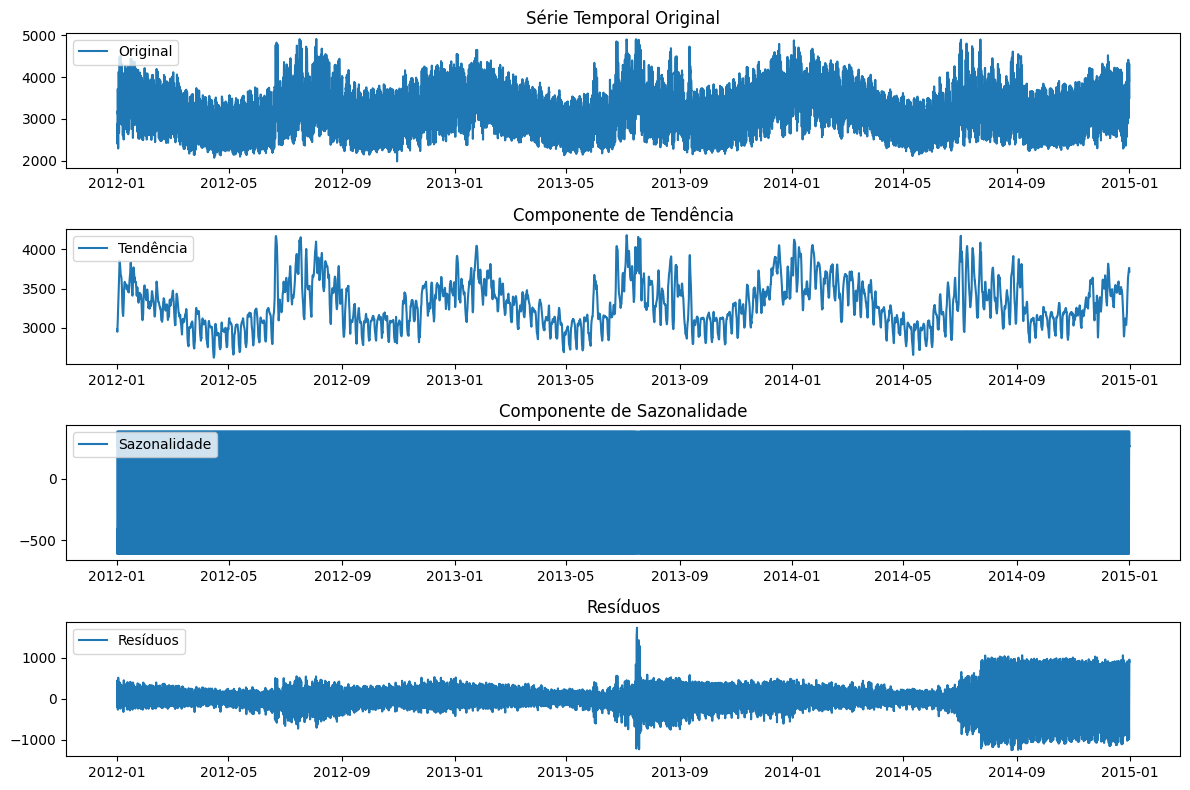

In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar a decomposição sazonal
result = seasonal_decompose(df['load'], model='additive', period=24)  # Periodo 24 para dados horários

# Plotar os componentes
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['load'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendência')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.title('Componente de Sazonalidade')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Resíduos')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()


In [282]:
# Calcular a matriz de correlação
correlation_matrix = df[['load', 'T']].corr()

# Imprimir os resultados
print(correlation_matrix)


          load         T
load  1.000000  0.060388
T     0.060388  1.000000


Baixa correlação entre temperatura e consumo

# DATA

<Axes: xlabel='datetime'>

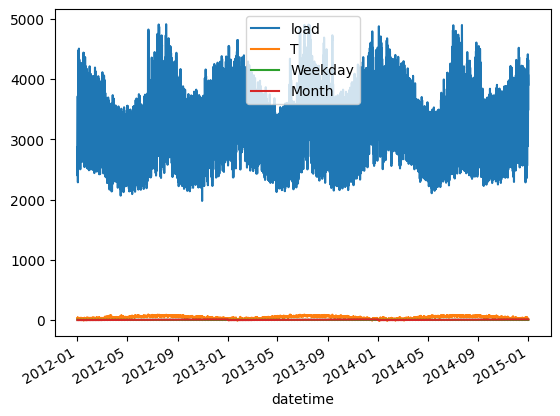

In [283]:

df.plot()

In [284]:
df.describe()

,load,T,Weekday,Month
count,26250.000000,26250.000000,26250.000000,26250.000000
mean,3300.174362,47.687657,5.001562,6.521143
std,559.507313,19.268934,2.002065,3.452363
min,1979.000000,-13.000000,2.000000,1.000000
25%,2866.000000,32.666667,3.000000,4.000000
50%,3363.000000,48.333333,5.000000,7.000000
75%,3688.000000,63.333333,7.000000,10.000000
max,4912.000000,93.000000,8.000000,12.000000


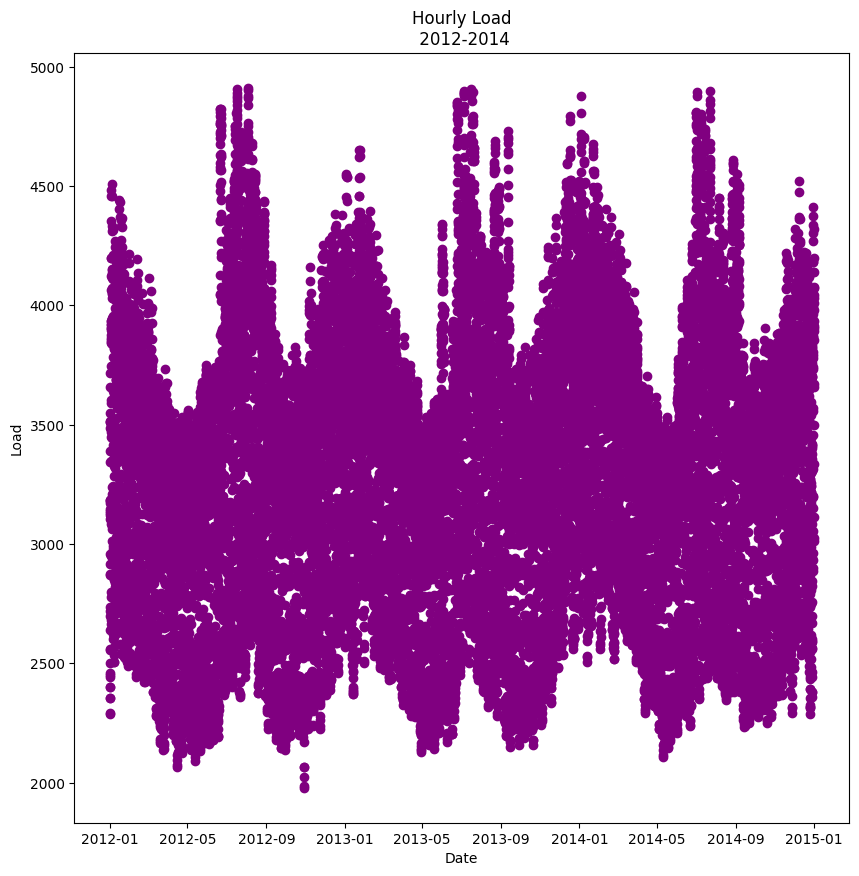

In [285]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,
           df['load'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Load",
       title="Hourly Load\n 2012-2014")

plt.show()

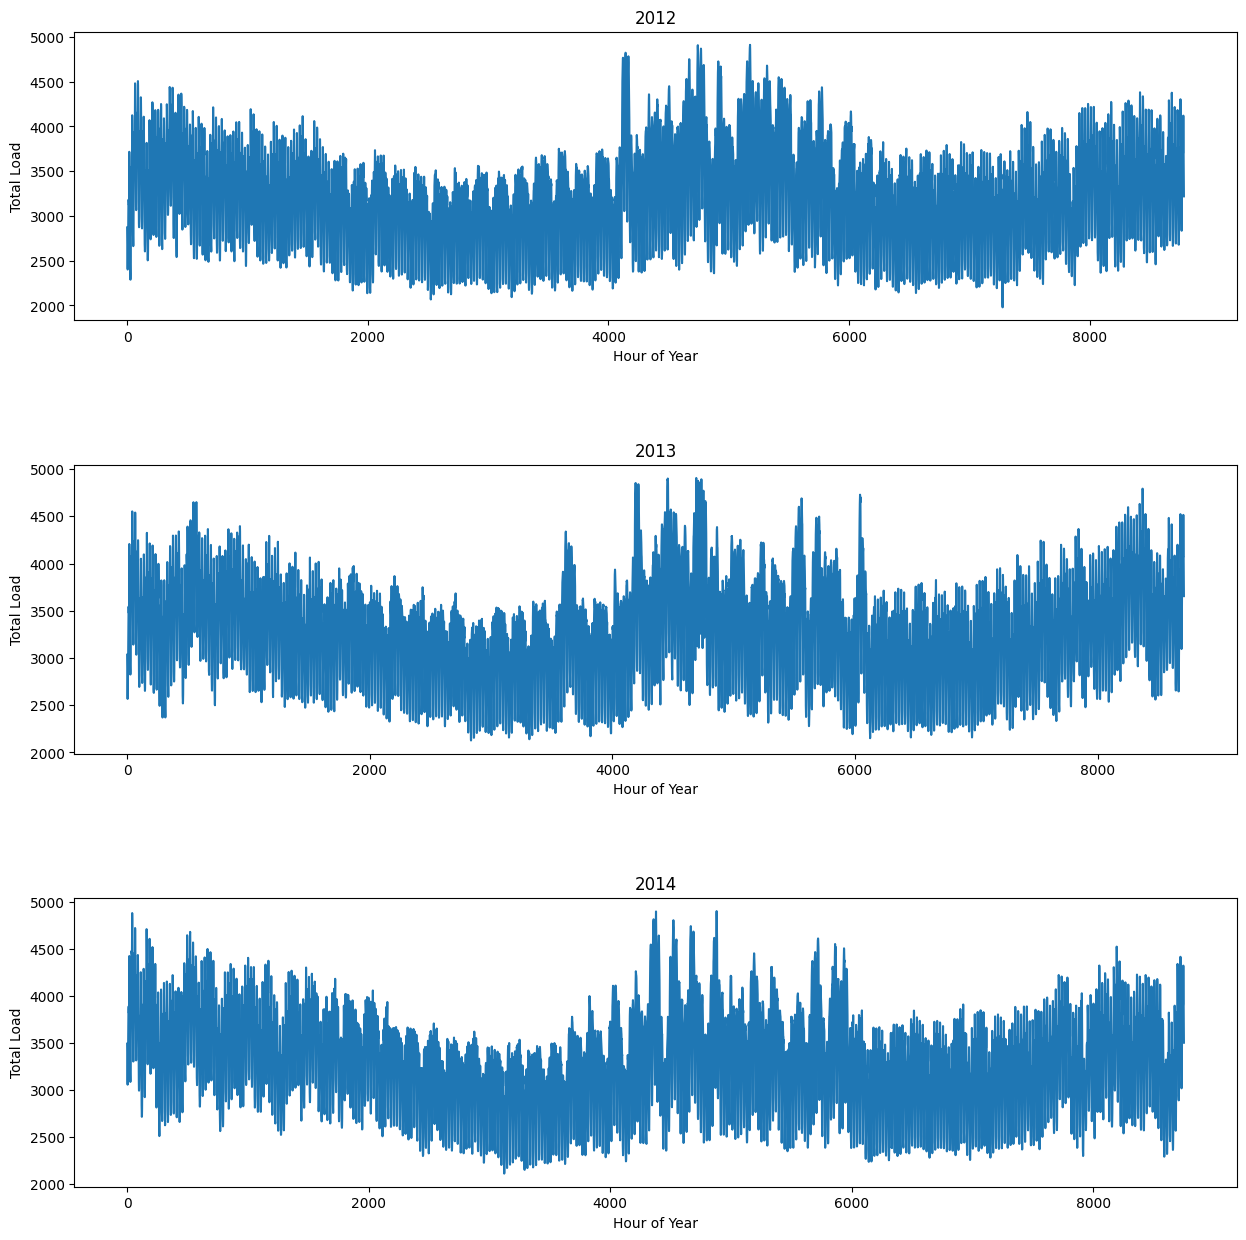

In [286]:
#group data by year
groups = df['load'].groupby(pd.Grouper(freq='A'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(15,15))


for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('Total Load')
    ax.set_title(name.year)
    plt.subplots_adjust(hspace=0.5)

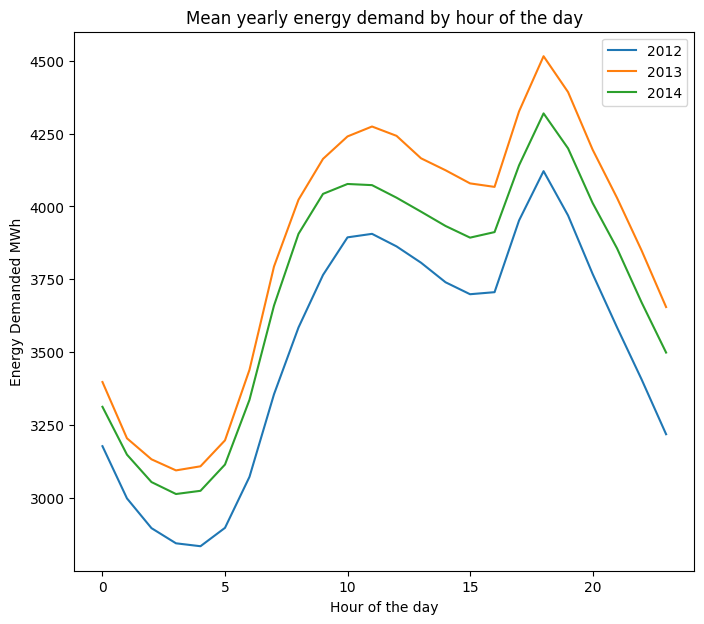

In [287]:
group_hours = df['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(8,7))

year_demands = pd.DataFrame()

for name, group in group_hours:
    year_demands[name.year] = pd.Series(group.values)

year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean yearly energy demand by hour of the day');

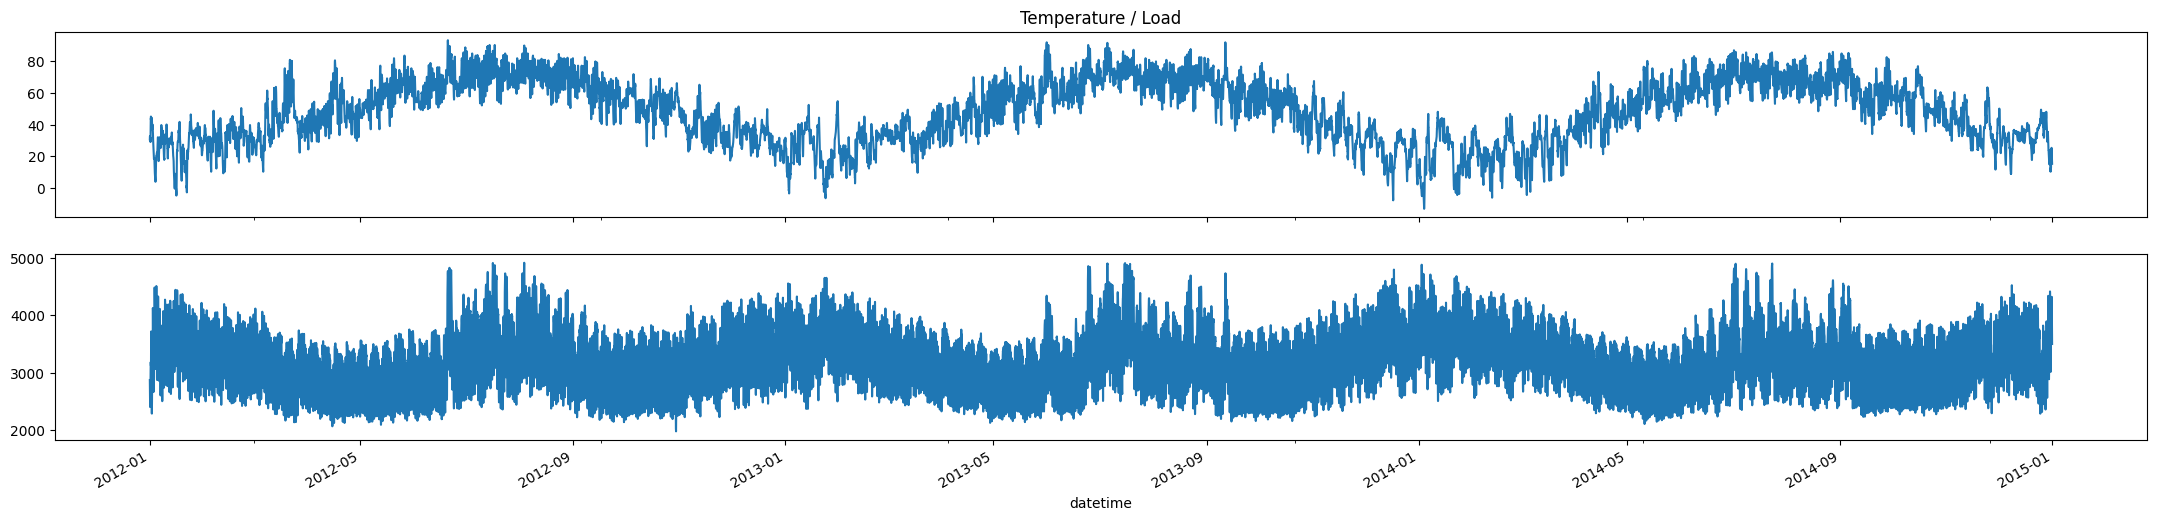

In [288]:
test = df
T = test['T']
load = test['load']

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(27,6))
T.plot(ax=ax1, label='Temperature', title='Temperature / Load')
load.plot(ax=ax2, label='Load')
plt.show()

We can se a pattern where when the temperature is higher the load is also higher

# Check Stationarity

In [218]:
from statsmodels.tsa.stattools import adfuller

# Função para realizar o Teste ADF
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Aplicar o Teste ADF para a série temporal de "load"
adf_test(df['load'])
# Aplicar o Teste ADF para a série temporal de "T"
adf_test(df['T'])
# Aplicar o Teste ADF para a série temporal de "Weekday"
adf_test(df['Weekday'])



ADF Statistic: -10.861899583502419
p-value: 1.4393271027020932e-19
Critical Values: {'1%': -3.4305996065332724, '5%': -2.8616503187533002, '10%': -2.5668287194080244}
ADF Statistic: -5.702657356375865
p-value: 7.612849456113257e-07
Critical Values: {'1%': -3.4305996065332724, '5%': -2.8616503187533002, '10%': -2.5668287194080244}
ADF Statistic: -23.879230161760777
p-value: 0.0
Critical Values: {'1%': -3.4305996065332724, '5%': -2.8616503187533002, '10%': -2.5668287194080244}


Todos os dados são estacionários

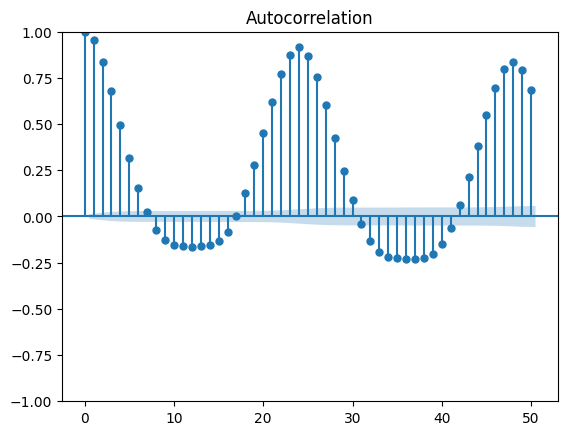

In [219]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotar o gráfico de autocorrelação
plot_acf(df['load'], lags=50)
plt.show()

In [292]:
# Dickey-Fuller

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20, 5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple', label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label='Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


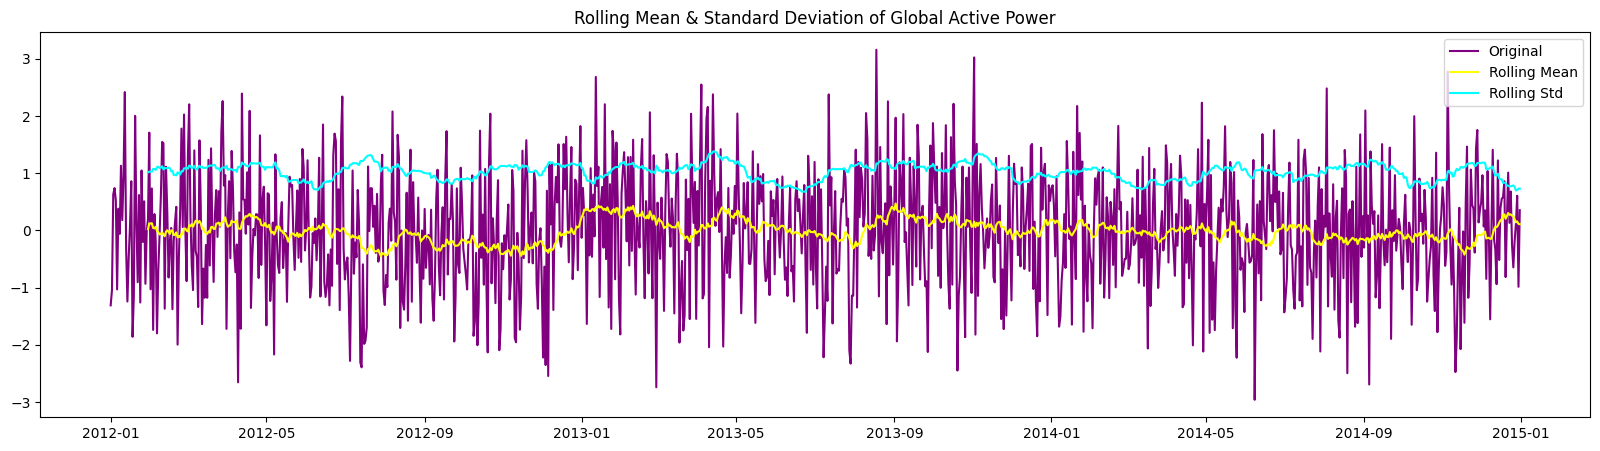

<Results of Dickey-Fuller Test>
Test Statistic                  -33.192946
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1095.000000
Critical Value (1%)              -3.436336
Critical Value (5%)              -2.864183
Critical Value (10%)             -2.568177
dtype: float64


In [294]:
# Criação de uma série temporal fictícia (substitua isso pelos seus dados reais)
date_rng = pd.date_range(start='2012-01-01', end='2014-12-31', freq='D')
timeseries = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Chamada da função test_stationarity
test_stationarity(timeseries)


#Forecasting


### Statistical Models

#### Data Pre-Processing

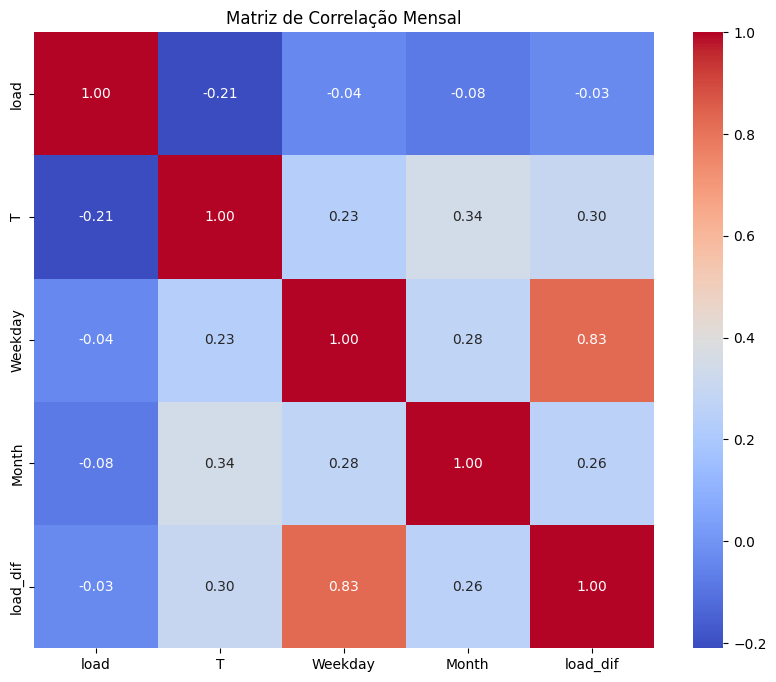

In [289]:
import seaborn as sns

# Plotar heatmap da matriz de correlação mensal
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação Mensal')
plt.show()



In [290]:
df

,load,T,Weekday,Month,MesAno
datetime,,,,,
2012-01-01 00:00:00,2872.0,30.666667,7,1,2012-01
2012-01-01 01:00:00,2698.0,32.000000,7,1,2012-01
2012-01-01 02:00:00,2558.0,32.666667,7,1,2012-01
2012-01-01 03:00:00,2444.0,30.000000,7,1,2012-01
2012-01-01 04:00:00,2402.0,31.000000,7,1,2012-01
...,...,...,...,...,...
2014-12-31 19:00:00,4199.0,20.000000,3,12,2014-12
2014-12-31 20:00:00,4012.0,18.000000,3,12,2014-12
2014-12-31 21:00:00,3856.0,16.666667,3,12,2014-12


<ipython-input-291-31b13dc35b21>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ma_monthly = df.resample('M').mean()


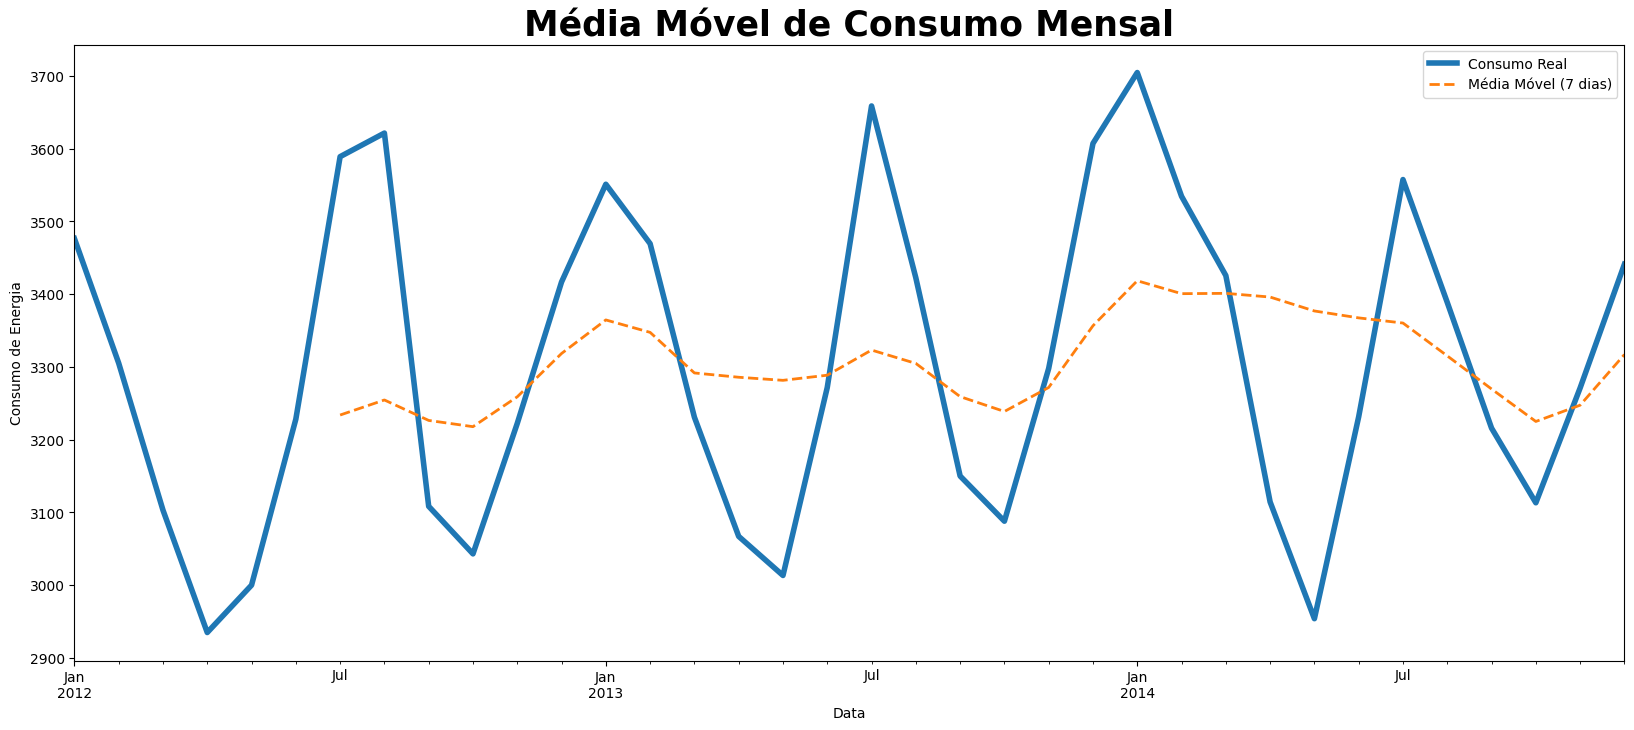

In [291]:
# Agrupar os dados por mês e calcular a média
ma_monthly = df.resample('M').mean()

# Calcular a média móvel para 7 dias
ma_monthly['Moving Average'] = ma_monthly['load'].rolling(window=7).mean()

# Plotar o gráfico
plt.figure(figsize=(20, 8))
actual = ma_monthly['load'][-37:]  # Últimos 37 meses para visualização
ma = ma_monthly['Moving Average'][-37:]  # Últimos 37 meses para visualização

actual.plot(label='Consumo Real', lw=4)
ma.plot(label='Média Móvel (7 dias)', ls='--', lw=2)
plt.title('Média Móvel de Consumo Mensal', weight='bold', fontsize=25)
plt.xlabel('Data')
plt.ylabel('Consumo de Energia')
plt.legend()
plt.show()


### Statistical models:
Select/derive a subset of data manageable by statistical models
Model the series with an adequate statistical function

##### MA(q) Model (Média Móvel de Ordem q): Modela a relação entre uma observação e o erro residual da média móvel.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-pack

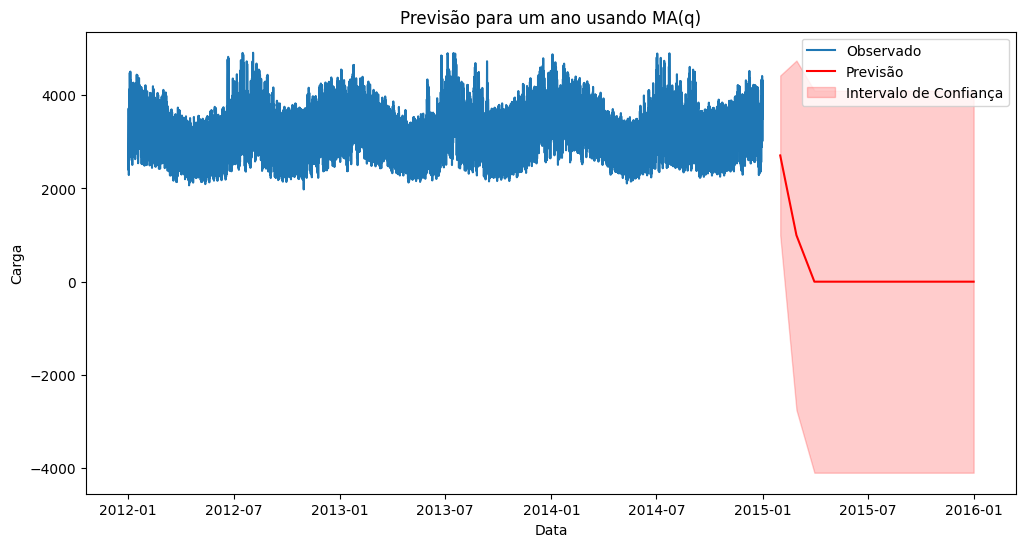

In [296]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Especificação do modelo MA(q)
order = (0, 0, 2)

# Ajuste do modelo
model = SARIMAX(df['load'], order=order)
results = model.fit()

# Previsão para um ano (12 meses)
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Confiança intervalar
ci = forecast.conf_int()

# Criação de datas para o eixo x
forecast_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(hours=1), periods=forecast_steps, freq='M')

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(df['load'], label='Observado')
plt.plot(forecast_dates, forecast.predicted_mean, color='red', label='Previsão')
plt.fill_between(forecast_dates, ci.iloc[:, 0], ci.iloc[:, 1], color='red', alpha=0.2, label='Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Carga')
plt.title('Previsão para um ano usando MA(q)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


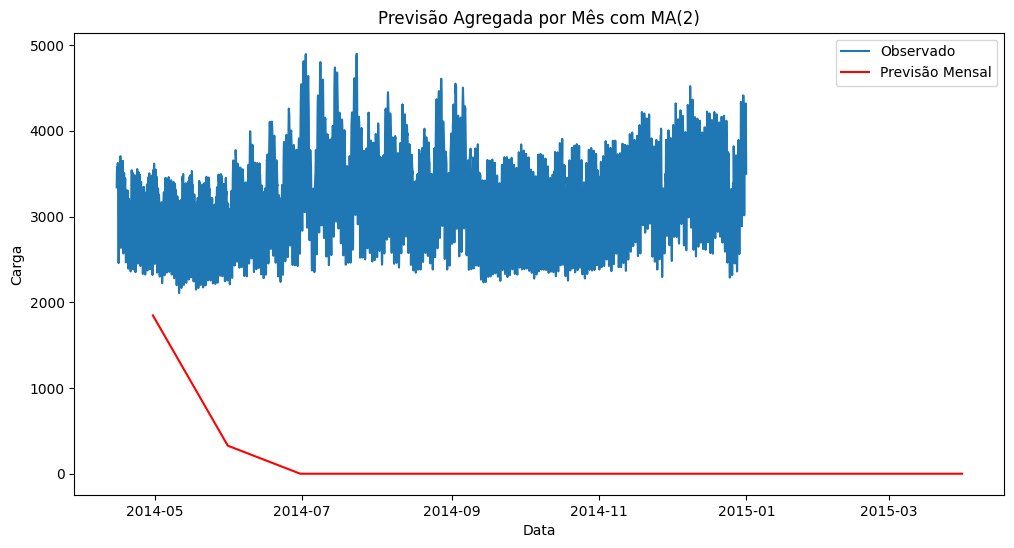

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Carregue seus dados
# Suponha que 'df' seja seu DataFrame com a coluna 'load'

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int) -> list:
    total_len = train_len + horizon
    pred_MA = []

    for i in range(train_len, total_len, window):
        model = SARIMAX(df['load'][:i], order=(0, 0, 2))
        res = model.fit(disp=False)
        predictions = res.get_prediction(start=i, end=i + window - 1)
        oos_pred = predictions.predicted_mean
        pred_MA.extend(oos_pred)

    return pred_MA

# Define os parâmetros
train_length = 20000  # Ajuste para o tamanho desejado
forecast_horizon = 12  # Número de meses para prever
rolling_window = 12  # Número de meses para prever

# Obtém as previsões
predictions = rolling_forecast(df, train_length, forecast_horizon, rolling_window)

# Agrega as previsões por mês-ano
pred_monthly = pd.Series(predictions, index=pd.date_range(start=df.index[train_length], periods=len(predictions), freq='M'))

# Plotar
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_length:], df['load'][train_length:], label='Observado')
plt.plot(pred_monthly.index, pred_monthly, color='red', label='Previsão Mensal')
plt.xlabel('Data')
plt.ylabel('Carga')
plt.title('Previsão Agregada por Mês com MA(2)')
plt.legend()
plt.show()


In [310]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['load'], order=(3,0,2))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


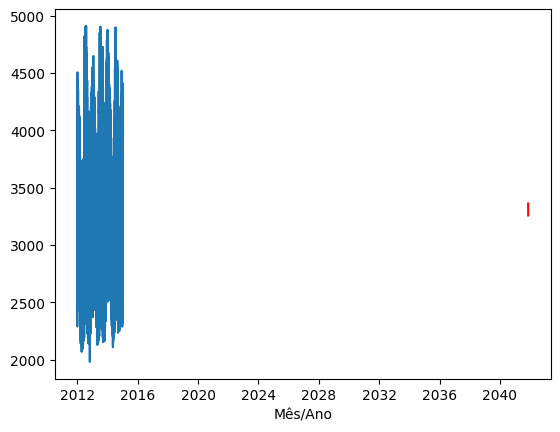

In [315]:

# Previsão para os próximos 24 meses
predictions = model_fit.predict(start=len(df), end=len(df)+1)

# Plotar as previsões
plt.plot(df['load'])
plt.plot(predictions, color='red')
plt.xlabel('Mês/Ano')
plt.show()


In [308]:
df


,load,T,Weekday,Month,MesAno
datetime,,,,,
2012-01-01 00:00:00,2872.0,30.666667,7,1,2012-01
2012-01-01 01:00:00,2698.0,32.000000,7,1,2012-01
2012-01-01 02:00:00,2558.0,32.666667,7,1,2012-01
2012-01-01 03:00:00,2444.0,30.000000,7,1,2012-01
2012-01-01 04:00:00,2402.0,31.000000,7,1,2012-01
...,...,...,...,...,...
2014-12-31 19:00:00,4199.0,20.000000,3,12,2014-12
2014-12-31 20:00:00,4012.0,18.000000,3,12,2014-12
2014-12-31 21:00:00,3856.0,16.666667,3,12,2014-12


### Machine learning models:

### Deep learning models:
Using LSTM and GRU networks

# Questions

**1. Statistical Models:**

- MA(q) Model (Média Móvel de Ordem q): Modela a relação entre uma observação e o  erro residual da média móvel.

- AR(p) Model (Auto-Regressivo de Ordem p): Modela a relação entre uma observação e seus últimos p valores.

- ARMA(p,q) Model (Auto-Regressivo de Ordem p e Média Móvel de Ordem q): Combina elementos de AR e MA.

- ARIMA(p,d,q) Model (Auto-Regressivo Integrado Média Móvel): Inclui diferenciação para tornar a série estacionária.

- SARIMA(p,d,q)(P,D,Q)m Model (Sazonal ARIMA): Estende o ARIMA para incluir componentes sazonais.

- SARIMAX Model (SARIMA com variáveis externas): Estende o SARIMA para incluir variáveis exógenas.


**2. Machine Learning Models:**

- Linear Regression: Modelo linear que assume uma relação linear entre variáveis.

- Random Forest: Ensemble de árvores de decisão que pode lidar com relacionamentos não lineares.

- Gradient Boosting: Ensemble de modelos fracos que são combinados para formar um modelo forte.

- Support Vector Machines (SVM): Modelos que mapeiam os dados em espaços dimensionais mais altos para encontrar hiperplanos de decisão.


**3. Deep Learning Models:**

- LSTM (Long Short-Term Memory): Rede neural recorrente que lida bem com dependências temporais de longo prazo.

- GRU (Gated Recurrent Unit): Variação mais leve de LSTM com capacidade semelhante de modelar dependências temporais.
